In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import base64

In [2]:
df = pd.read_excel('../data/raw/Crisis_reports 2015-Present.xlsx')
# ../data_folder/data.csv

In [3]:
df['Disposition'] = df['Disposition'].str.upper().str.replace (" / ", "/", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.upper().str.replace ("BEHAVIOR – ", "", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace ("BEHAVIOR - ", "", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace (" / ", "/", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace ("\xa0", "", regex = True)
df['Offense/Incident Ind'] = df['Offense/Incident Ind'].str.upper()
df['Subject Gender'] = df['Subject Gender'].str.upper()
df['Subject Race'] = df['Subject Race'].str.upper()
df['Techniques Used'] = df['Techniques Used'].str.upper()
df['UoF Indicator'] = df['UoF Indicator'].str.replace ("N", "NO", regex = True)
df['UoF Indicator'] = df['UoF Indicator'].str.replace ("Y", "YES", regex = True)
df["Weapons Involved"] = df["Weapons Involved"].str.upper()
df['Weapons Involved'] = df['Weapons Involved'].str.replace("HANDGUN", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("RIFLE", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("SHOTGUN", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("OTHER FIREARM", "FIREARM", regex = True)

In [4]:
df = df.rename(columns = {'Exhibiting Behavior (group)': 'Behavior',
                          'Reported Date (Date)': 'Date',
                          'Offense/Incident Ind': 'OffenseIncident',
                          'Subject Age': 'Age',
                          'Subject Gender': 'Gender',
                          'Subject Race': 'Race',
                          'Techniques Used': 'Techniques',
                          'UoF Indicator': 'UoF',
                          'Weapons Involved': 'Weapons'})

#Convert ‘Date’ to DateTime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.loc[:,df.dtypes == object] = df.loc[:,df.dtypes == object].apply(lambda x: x.str.strip().str.replace('#NAME?', '-'))


<ipython-input-5-ffd2d72bc747>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[:,df.dtypes == object] = df.loc[:,df.dtypes == object].apply(lambda x: x.str.strip().str.replace('#NAME?', '-'))


# Create Month and Day Column

In [95]:
df['M'] = df['Date'].dt.month
df['day']= df['Date'].dt.day

# Created the month by year column

In [7]:
#Converts to the Month of each year
df['MONTH'] = df['Date'].dt.to_period('M')


MONTH
2015-05     403
2015-06     865
2015-07     848
2015-08     846
2015-09     794
           ... 
2021-02    2760
2021-03    3040
2021-04    3261
2021-05    3266
2021-06     840
Freq: M, Length: 74, dtype: int64

# Created Day Of The Week Column


In [11]:
df["day_of_week"] = df["Date"].dt.dayofweek
df["day_of_week"].head()

0    4
1    5
2    5
3    4
4    5
Name: day_of_week, dtype: int64

In [97]:
df.head()

,Behavioral Crisis Num,CAD Event ID,Disposition,Behavior,OffenseIncident,Age,Gender,Race,Techniques,UoF,Weapons,Date,MONTH,DAY,day_of_week,YEAR,M,day
0,43653,2015000159907,NO ACTION POSSIBLE/NECESSARY,-,-,-1,-,-,-,NO,-,2015-05-15,2015-05,2015-05-15,4,2015,5,15
1,43719,2015000160408,UNABLE TO CONTACT,-,-,-1,-,-,-,NO,-,2015-05-16,2015-05,2015-05-16,5,2015,5,16
2,43845,2015000160465,RESOURCES DECLINED,-,-,-1,-,-,-,NO,-,2015-05-16,2015-05,2015-05-16,5,2015,5,16
3,43992,2015000159631,GERIATRIC REGIONAL ASSESSMENT TEAM,-,-,-1,-,-,-,NO,-,2015-05-15,2015-05,2015-05-15,4,2015,5,15
4,44102,-1,VOLUNTARY COMMITTAL,-,-,-1,-,-,-,NO,-,2015-05-16,2015-05,2015-05-16,5,2015,5,16


In [40]:
df['Behavioral Crisis Num'].unique().size

61411

In [38]:
df.shape

(100032, 12)

In [7]:
df.dtypes

Behavioral Crisis Num             int64
CAD Event ID                      int64
Disposition                      object
Behavior                         object
OffenseIncident                  object
Age                               int64
Gender                           object
Race                             object
Techniques                       object
UoF                              object
Weapons                          object
Date                     datetime64[ns]
dtype: object

# UoF = Yes Columns


In [98]:
yes_df = df[df['UoF']=='YES']
yes_df

,Behavioral Crisis Num,CAD Event ID,Disposition,Behavior,OffenseIncident,Age,Gender,Race,Techniques,UoF,Weapons,Date,MONTH,DAY,day_of_week,YEAR,M,day
23,45345,2015000168005,SUBJECT ARRESTED,-,-,-1,-,-,-,YES,-,2015-05-22,2015-05,2015-05-22,4,2015,5,22
114,49408,2015000183323,SUBJECT ARRESTED,-,-,-1,-,-,-,YES,-,2015-06-02,2015-06,2015-06-02,1,2015,6,2
284,59139,2015000223133,SUBJECT ARRESTED,-,-,-1,-,-,-,YES,-,2015-07-01,2015-07,2015-07-01,2,2015,7,1
697,79547,2015000310474,EMERGENT DETENTION/ITA,-,-,-1,-,-,-,YES,-,2015-09-04,2015-09,2015-09-04,4,2015,9,4
727,80998,2015000316370,EMERGENT DETENTION/ITA,-,-,-1,-,-,-,YES,-,2015-09-09,2015-09,2015-09-09,2,2015,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99907,23626983651,2021000108797,ARRESTED (REQUIRES ARREST REPORT),VERBALLY THREATENING/AGGRESSIVE,OFFENSE,52,Female,Unknown,HANDCUFFING,YES,NONE/NOT APPLICABLE,2021-05-04,2021-05,2021-05-04,1,2021,5,4
99908,23626983651,2021000108797,ARRESTED (REQUIRES ARREST REPORT),VERBALLY THREATENING/AGGRESSIVE,OFFENSE,52,Female,Unknown,VERBALIZATION,YES,NONE/NOT APPLICABLE,2021-05-04,2021-05,2021-05-04,1,2021,5,4
100006,25389288706,2020000307058,ARRESTED (REQUIRES ARREST REPORT),VERBALLY THREATENING/AGGRESSIVE,OFFENSE,25,Male,Asian,GURNEY,YES,BLUNT OBJECT/STRIKING IMPLEMENT,2021-06-03,2021-06,2021-06-03,3,2021,6,3
100007,25389288706,2020000307058,ARRESTED (REQUIRES ARREST REPORT),VERBALLY THREATENING/AGGRESSIVE,OFFENSE,25,Male,Asian,HANDCUFFING,YES,BLUNT OBJECT/STRIKING IMPLEMENT,2021-06-03,2021-06,2021-06-03,3,2021,6,3


## UoF = Yes Disposition

In [153]:
#subcat: yes only for disposition
# yes_df['Disposition'].groupby(level=None).size()
yes_1 = yes_df.groupby(['Disposition']).size().sort_values(ascending = False) # len() 15

Text(0.5, 1.0, 'Disposition Type')

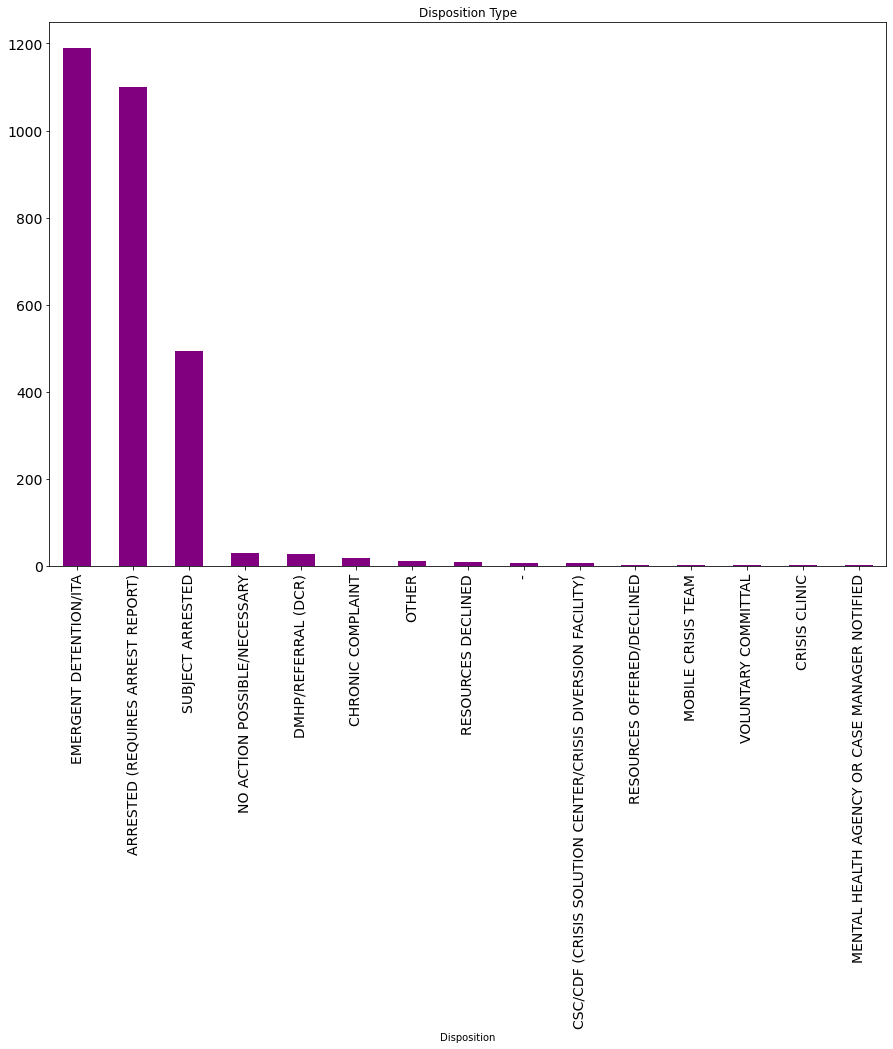

In [154]:
yes_disposition = yes_1.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
yes_disposition.set_title('Disposition Type')

In [55]:
#the entire data
# df['Disposition'].value_counts()#.sort_values(ascending = False) 

## UoF = Yes Behavior

Text(0.5, 1.0, 'UoF YES - Behavior')

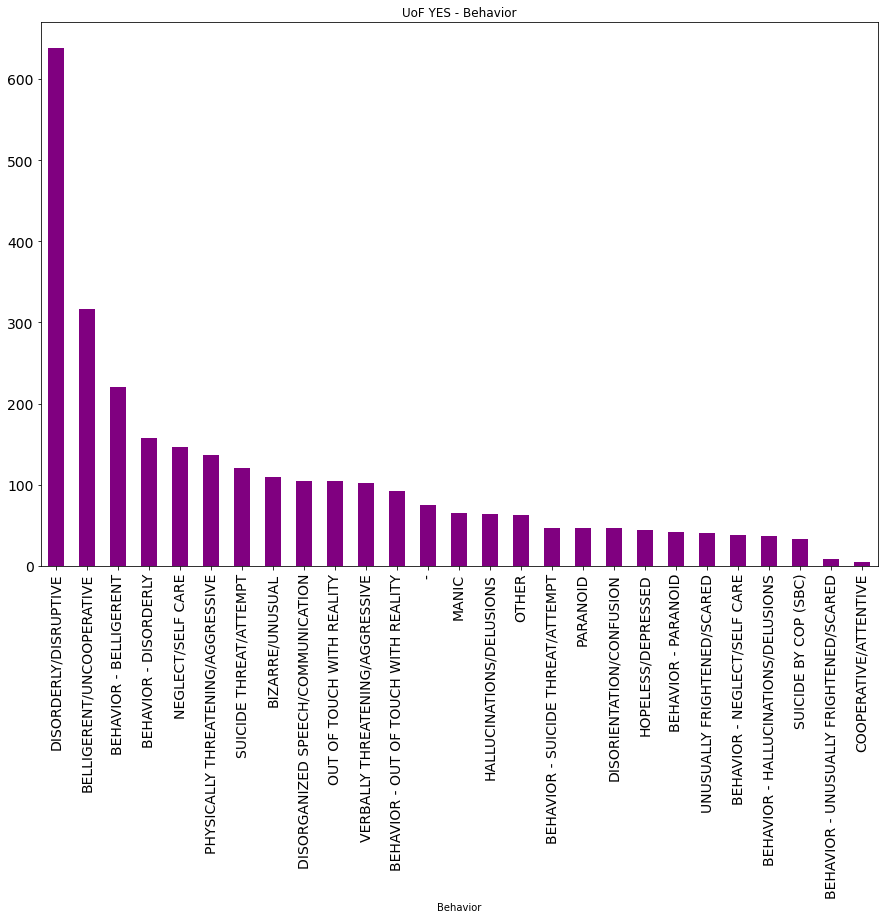

In [23]:
yes_2 = yes_df.groupby(['Behavior']).size().sort_values(ascending = False) # len() 15
yes_behavior = yes_2.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
yes_behavior.set_title('UoF YES - Behavior')

## UoF = YES OffenseIncident

Text(0.5, 1.0, 'UoF YES - Offense Incident')

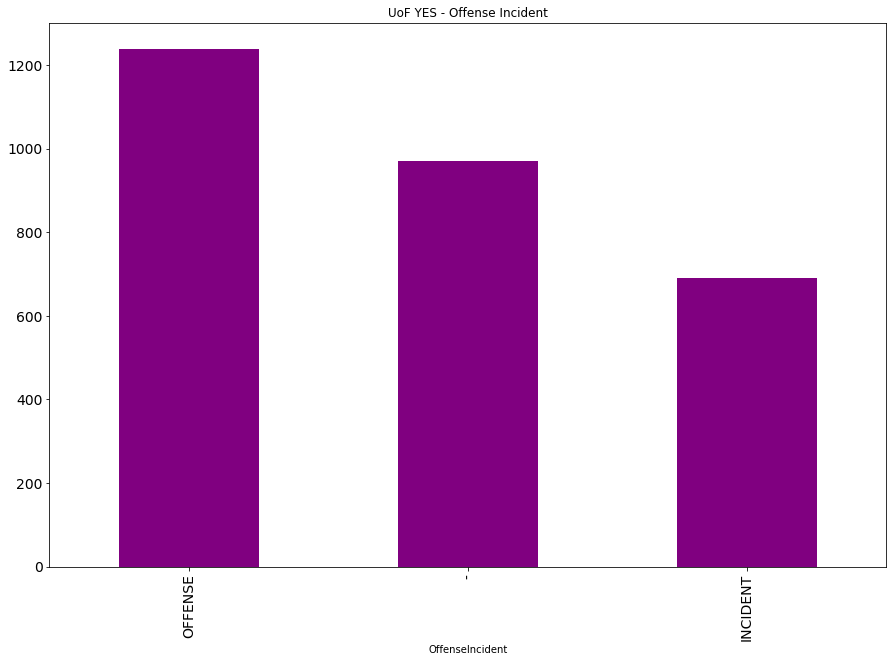

In [22]:
yes_3 = yes_df.groupby(['OffenseIncident']).size().sort_values(ascending = False) # len() 15
yes_offenseinc = yes_3.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
yes_offenseinc.set_title('UoF YES - Offense Incident')

## UoF = Yes Age

Text(0.5, 1.0, 'UoF YES - Age')

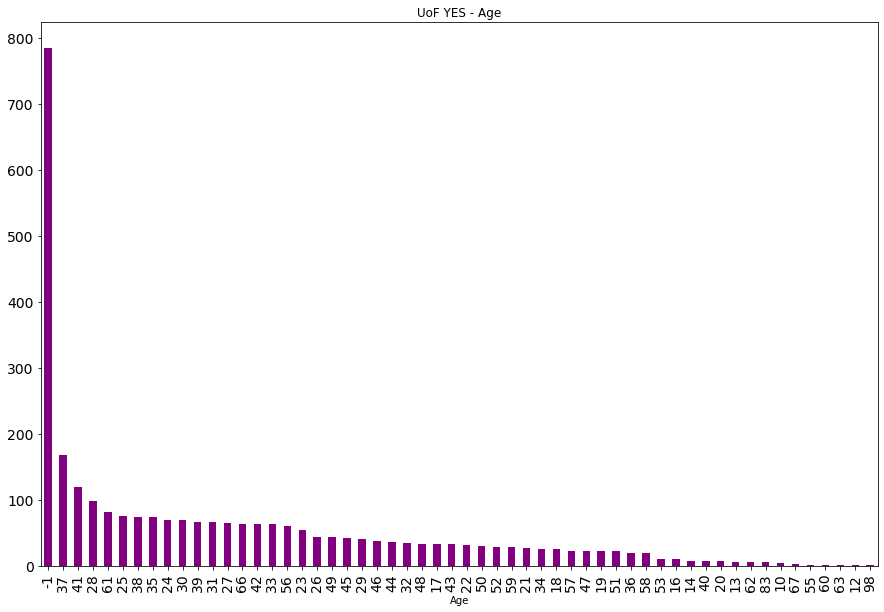

In [24]:
yes_4 = yes_df.groupby(['Age']).size().sort_values(ascending = False) # len() 15
yes_age = yes_4.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
yes_age.set_title('UoF YES - Age')

Text(0.5, 1.0, 'UoF YES - Age')

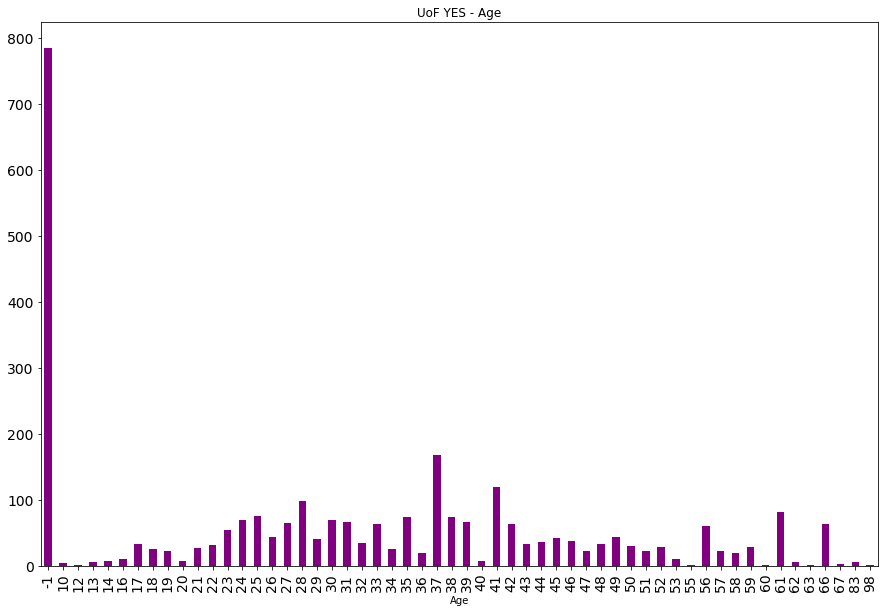

In [57]:
yes_4_1 = yes_df.groupby(['Age']).size()#.sort_values(ascending = False) # len() 15
yes_age = yes_4_1.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
yes_age.set_title('UoF YES - Age')

## UoF = YES Race 

Text(0.5, 1.0, 'UoF YES -Race')

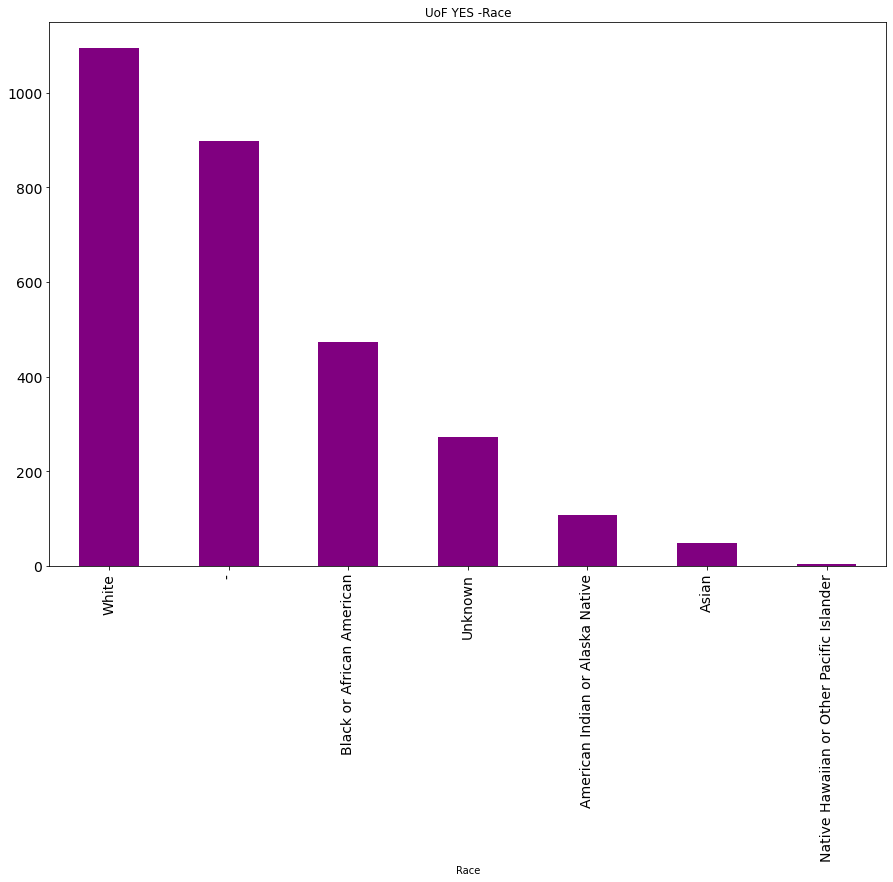

In [25]:
yes_5 = yes_df.groupby(['Race']).size().sort_values(ascending = False) # len() 15
yes_race = yes_5.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
yes_race.set_title('UoF YES -Race')

## UoF = Yes Gender

Text(0.5, 1.0, 'UoF Yes - Gender')

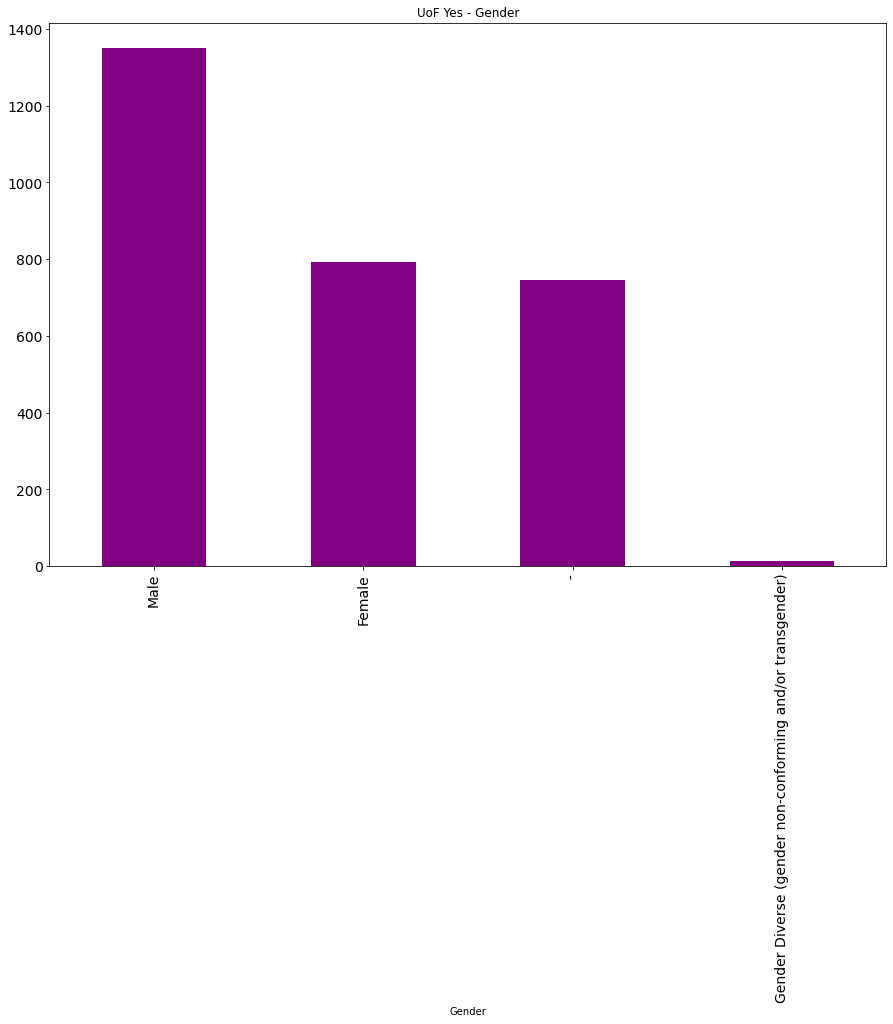

In [26]:
yes_6 = yes_df.groupby(['Gender']).size().sort_values(ascending = False) # len() 15
yes_gender = yes_6.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
yes_gender.set_title('UoF Yes - Gender')

## UoF Yes Techniques

Text(0.5, 1.0, 'UoF Yes - Techniques')

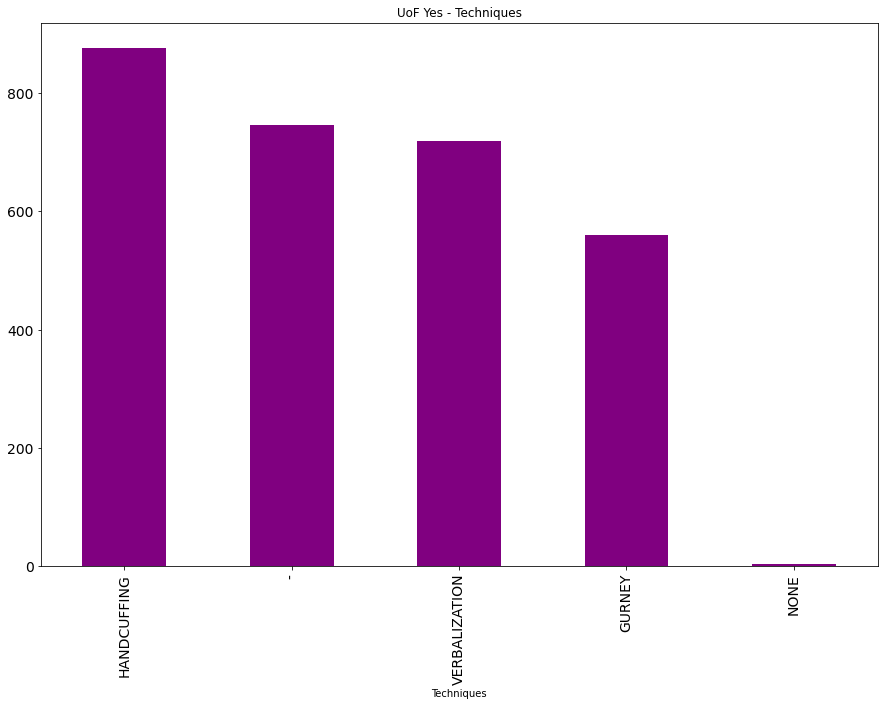

In [27]:
yes_7 = yes_df.groupby(['Techniques']).size().sort_values(ascending = False) # len() 15
yes_tech = yes_7.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
yes_tech.set_title('UoF Yes - Techniques')

Text(0.5, 1.0, 'UoF YES - Offense Incident')

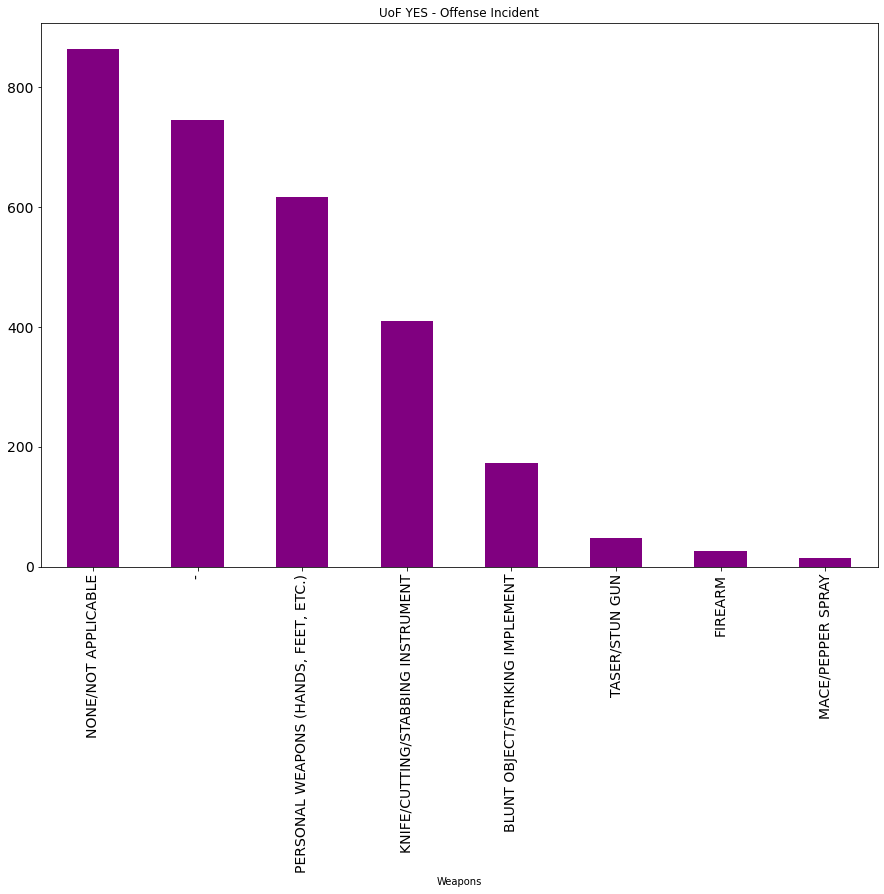

In [29]:
yes_8 = yes_df.groupby(['Weapons']).size().sort_values(ascending = False) 
yes_weapons = yes_8.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
yes_weapons.set_title('UoF YES - Offense Incident')

# Made a Function for the BAR PLOT

In [36]:
def plot_yes(column_name):
        
    ''' 
    Function will print a graph of the specified column name where UoF is Yes

    arguments: column_name

    Outputs:
    none only a graph

    '''
    yes_df = df[df['UoF']=='YES']
    yes_1 = yes_df.groupby([column_name]).size().sort_values(ascending = False) # len() 15
    yes_2 = yes_1.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
    yes_2.set_title('Yes UoF - '+ column_name)



# Monthly Totals

In [121]:
#Group by number of incidents in each month/year
monthly_incidents = df.groupby(['MONTH']).size()
#result
monthly_incidents

MONTH
2015-05     403
2015-06     865
2015-07     848
2015-08     846
2015-09     794
           ... 
2021-02    2760
2021-03    3040
2021-04    3261
2021-05    3266
2021-06     840
Freq: M, Length: 74, dtype: int64

Text(0, 0.5, 'Number of Incidents')

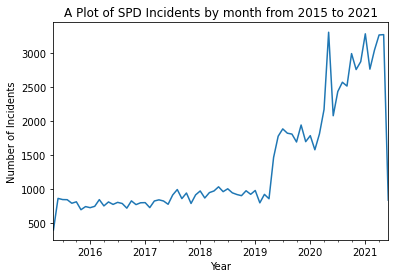

In [8]:
monthly_incidents.plot()
#labels
plt.title('A Plot of SPD Incidents by month from 2015 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

In [49]:
# plot_yes('Date')

In [119]:
#generate column by day of year
# df['DAY'] = df['Date'].dt.to_period('D')
#group by day of year
# df['DAY'] = df['DAY'].groupby().sort_values(ascending = False)
daily_incidents = df['Date'].value_counts(ascending = False)
daily_incidents

2021-06-02    202
2020-05-04    199
2020-05-14    189
2021-04-19    183
2021-01-27    180
             ... 
2017-06-10     10
2015-05-16      9
2015-05-15      7
2015-05-19      7
2021-06-08      2
Name: Date, Length: 2217, dtype: int64

Text(0, 0.5, 'Number of Incidents')

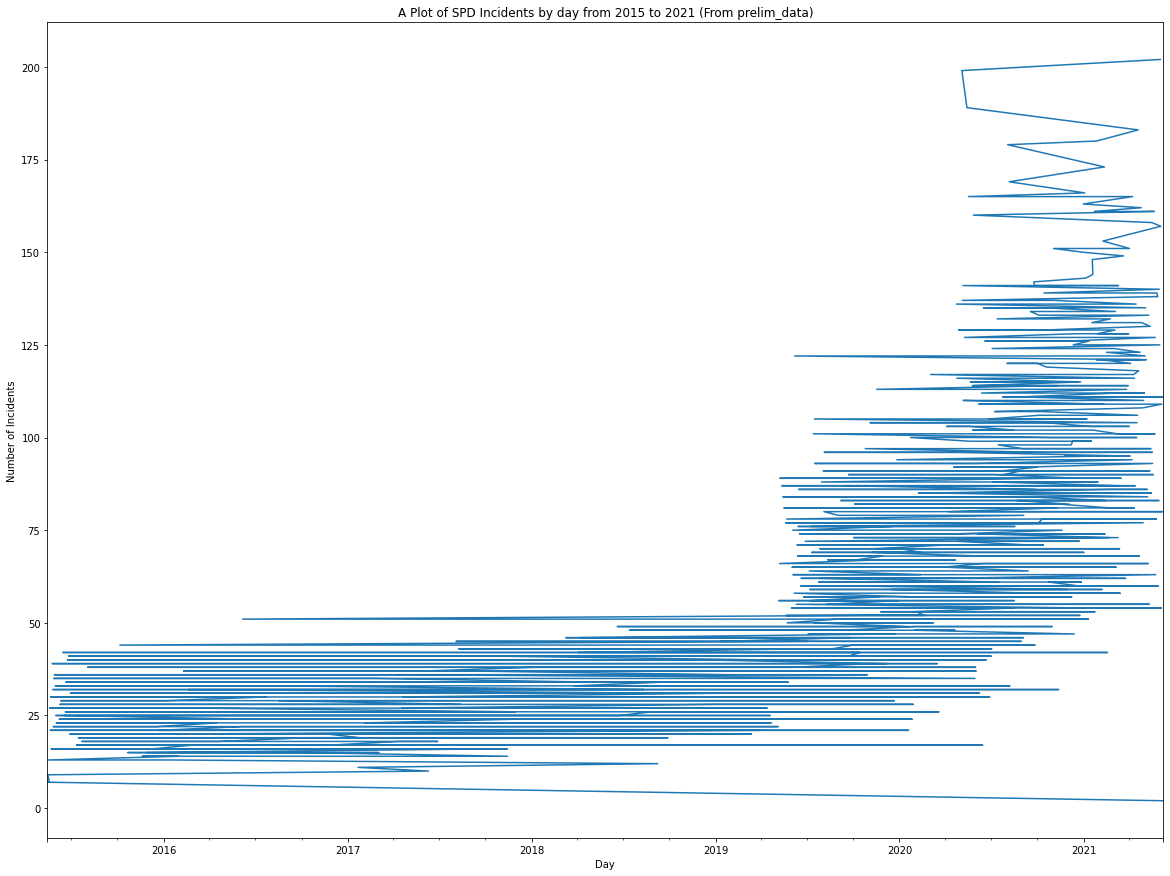

In [105]:
daily_incidents.plot(figsize=(20,15))
plt.title('A Plot of SPD Incidents by day from 2015 to 2021 (From prelim_data)')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
# plt.subplots(figsize=(20,15))


# Daily Totals by day in the whole DF

In [113]:
daily_totals = df.groupby('day').size()
daily_totals

day
1     3143
2     3601
3     3670
4     3650
5     3574
6     3403
7     3455
8     3349
9     3251
10    3218
11    3225
12    3154
13    3150
14    3078
15    3201
16    3267
17    3416
18    3280
19    3348
20    3248
21    3153
22    3455
23    3139
24    3031
25    3215
26    3164
27    3421
28    3216
29    2855
30    2784
31    1918
dtype: int64

Text(0, 0.5, 'Number of Occurrences')

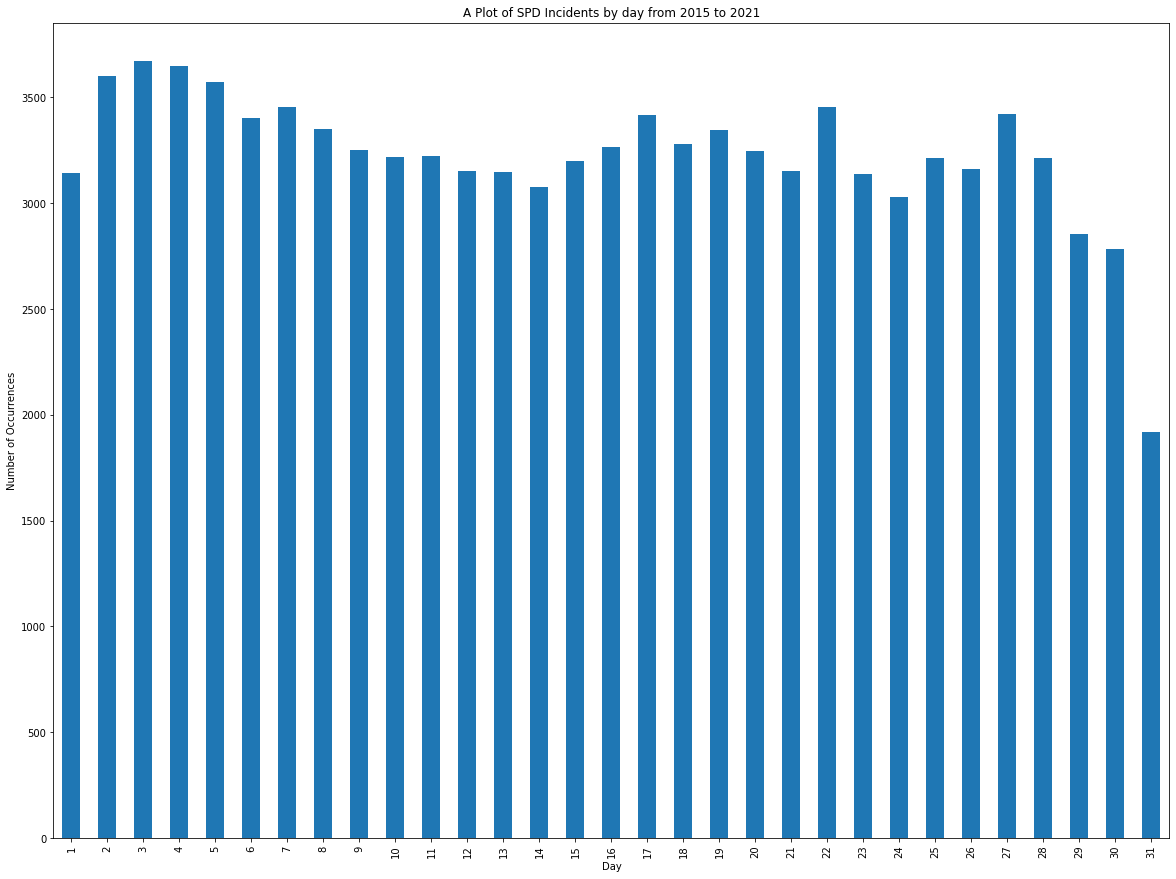

In [115]:
daily_totals.plot(kind= 'bar',figsize=(20,15))
plt.title('A Plot of SPD Incidents by day from 2015 to 2021')
plt.xlabel('Day')
plt.ylabel('Number of Occurrences')

# occurrences by day and UoF YES

In [116]:
yes_daily = yes_df.groupby('day').size()
yes_daily

day
1     109
2     104
3      88
4     186
5      59
6     115
7     113
8      56
9     109
10     57
11     80
12    133
13     87
14     47
15     99
16     66
17    109
18     78
19    117
20     97
21     80
22    150
23     89
24    150
25     61
26     78
27     86
28    113
29     60
30     73
31     51
dtype: int64

<AxesSubplot:xlabel='day'>

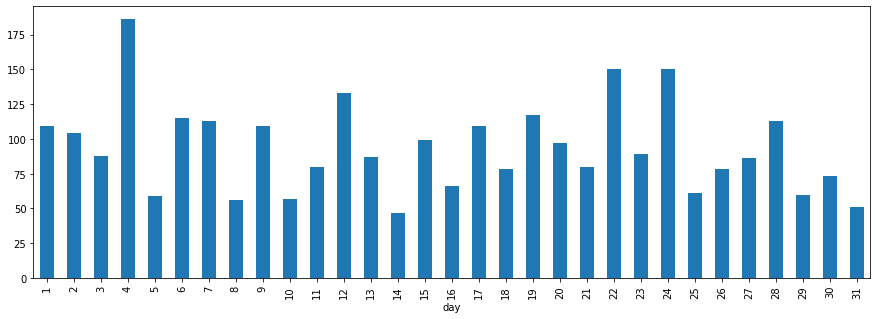

In [118]:
yes_daily.plot(kind = 'bar', figsize= (15, 5))

# Crosstable of Disposition by Day of The Week

In [13]:
a = pd.crosstab(df['Disposition'], df['day_of_week'])
pd.crosstab(df['Disposition'], df['day_of_week'])

day_of_week,0,1,2,3,4,5,6
Disposition,,,,,,,
-,262,239,227,227,251,239,173
ARRESTED (REQUIRES ARREST REPORT),957,893,704,999,838,951,707
CASE MANAGER/MH AGENCY NOTIFIED,98,100,100,117,115,34,44
CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM),14,10,10,6,12,12,2
CHRONIC COMPLAINT,644,648,636,709,645,629,667
COURTESY TRANSPORT,72,81,85,67,85,109,97
CRISIS CLINIC,67,78,70,63,61,69,63
CRISIS CLINIC (CRISIS CONNECTIONS),15,33,24,24,21,23,14
CRISIS RESPONSE BULLETIN REFERENCED,2,12,3,6,5,2,4


Text(0.5, 1.0, 'Disposition by Day of the Week')

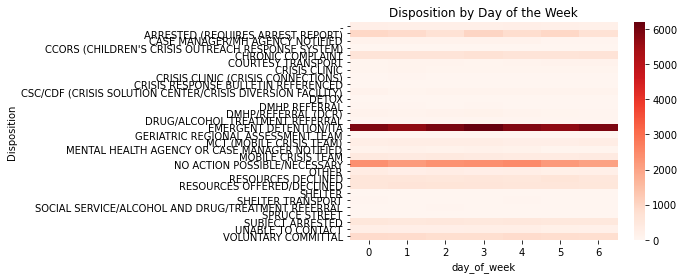

In [14]:
ax1 = sns.heatmap(a, cmap="Reds", xticklabels= True, yticklabels= True)
ax1.set_title("Disposition by Day of the Week")

# Created Year column

In [15]:
df['YEAR'] = pd.to_datetime(df['Date'])
df['YEAR'] = df['YEAR'].dt.to_period('Y')
yearly_incidents = df.groupby(['YEAR']).size()
yearly_incidents

YEAR
2015     6015
2016     9393
2017    10234
2018    11450
2019    17650
2020    28845
2021    16445
Freq: A-DEC, dtype: int64

<AxesSubplot:xlabel='YEAR'>

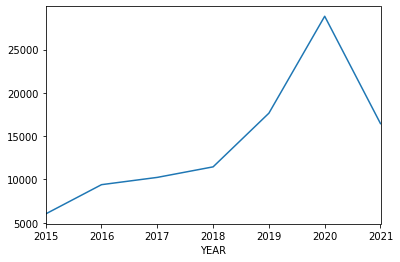

In [16]:
yearly_incidents.plot()

# UoF yes and no Incidents by Year and month

In [17]:
monthly_uof = df.groupby(['MONTH', 'UoF' ]).size()
monthly_uof.to_frame().reset_index()

,MONTH,UoF,0
0,2015-05,NO,392
1,2015-05,YES,11
2,2015-06,NO,849
3,2015-06,YES,16
4,2015-07,NO,834
...,...,...,...
143,2021-04,YES,113
144,2021-05,NO,3186
145,2021-05,YES,80
146,2021-06,NO,828


In [20]:
monthly_yes = yes_df.groupby(['MONTH', 'UoF' ]).size()
monthly_yes.to_frame().reset_index()
monthly_yes['number_of_accidents'] = monthly_yes[0]
monthly_yes.head()


MONTH    UoF
2015-05  YES    11
2015-06  YES    16
2015-07  YES    14
2015-08  YES    20
2015-09  YES    13
dtype: int64

<AxesSubplot:xlabel='MONTH,UoF'>

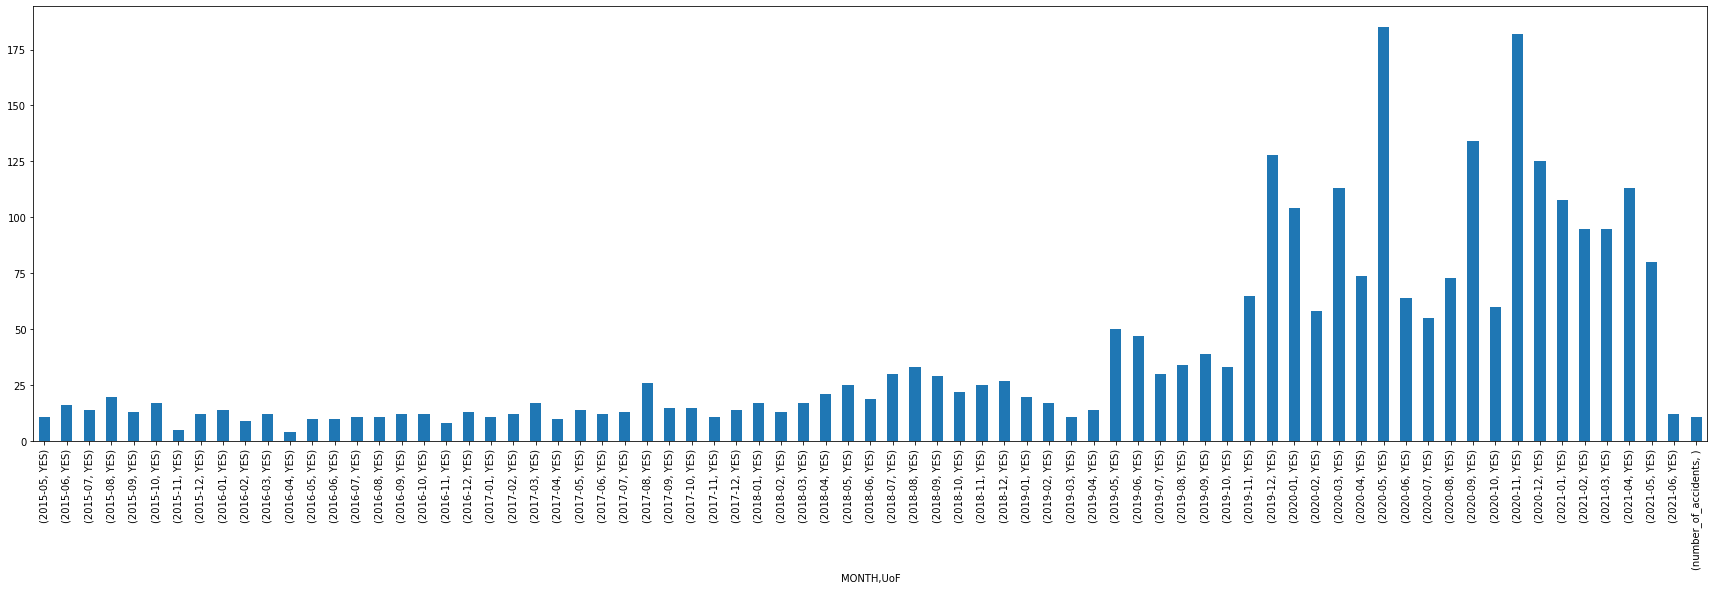

In [175]:
monthly_yes.plot(kind = 'bar', figsize=(30,8))


In [21]:
#uof incidents by year
monthly_uof = df.groupby(['MONTH', 'UoF' ]).size()
monthly_uof.to_frame().reset_index()
monthly_uof['number_of_accidents'] = monthly_uof[0]
monthly_uof.head()

MONTH    UoF
2015-05  NO     392
         YES     11
2015-06  NO     849
         YES     16
2015-07  NO     834
dtype: int64

In [237]:
# monthly_uof.plot(figsize=(25,8))
# plt.subplots(figsize=(20,8))

<AxesSubplot:xlabel='MONTH,UoF'>

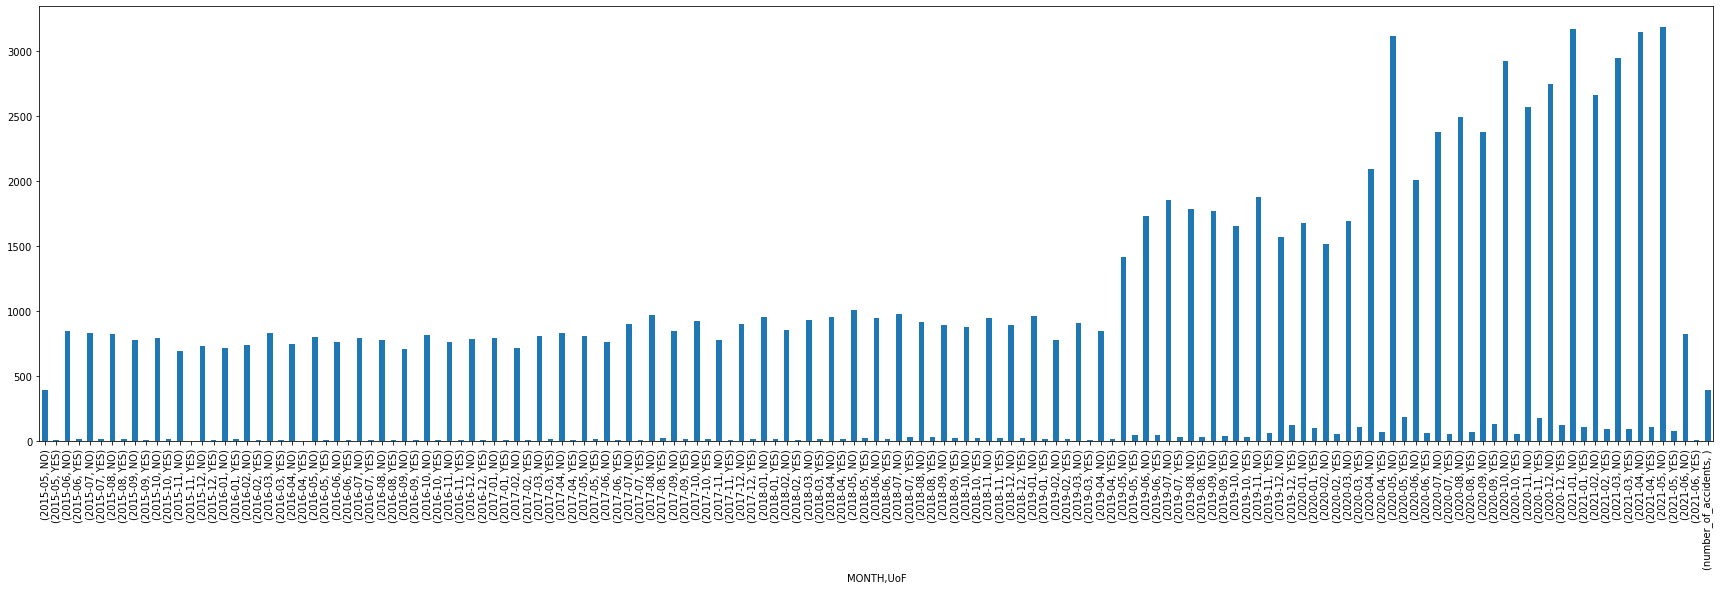

In [22]:
monthly_uof.plot(kind = 'bar', figsize=(30,8))


# UoF Yes and by Month

In [35]:
monthly_yes2 = yes_df.groupby(['M', 'UoF' ]).size()
monthly_yes2.to_frame().reset_index()
monthly_yes2['number_of_accidents'] = monthly_yes[0]
monthly_yes2.head()

M  UoF
1  YES    274
2  YES    204
3  YES    265
4  YES    236
5  YES    375
dtype: int64

Text(0, 0.5, 'Frequency')

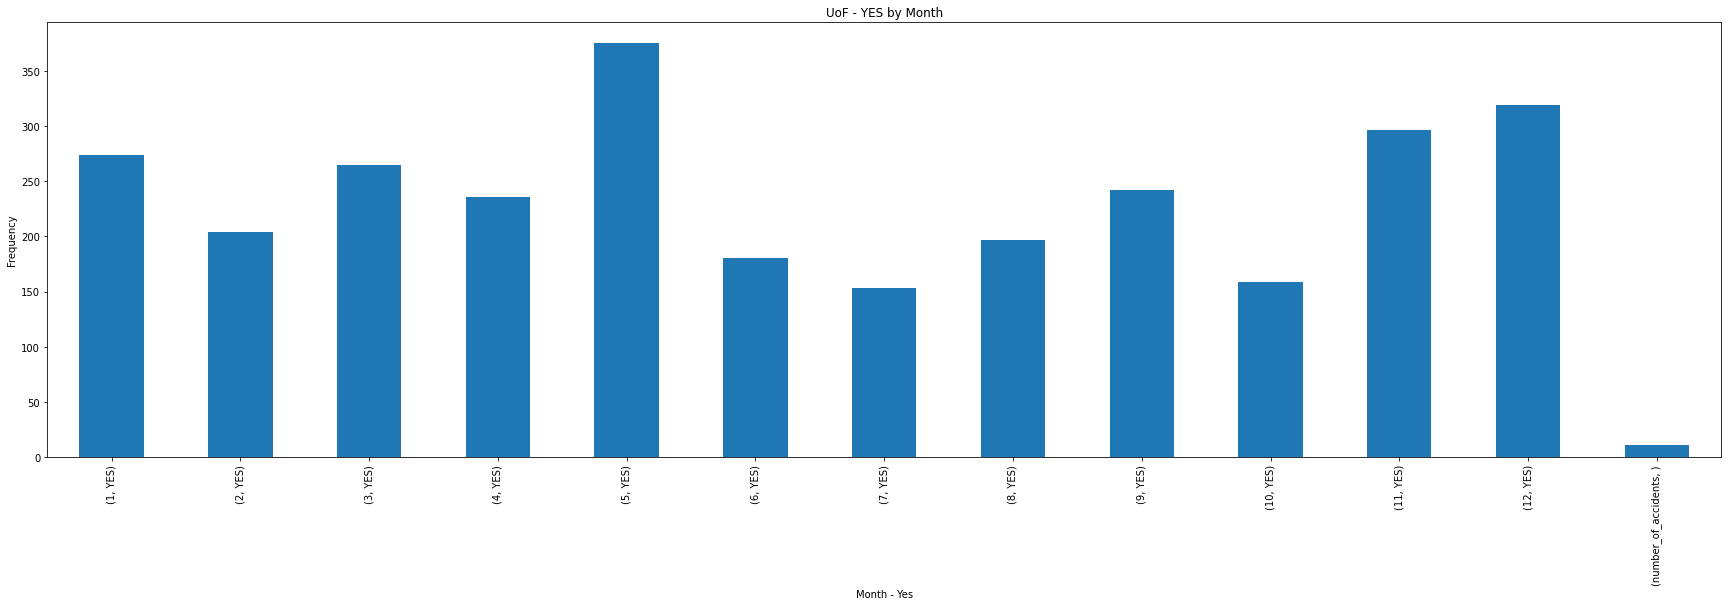

In [43]:
monthly_yes2.plot(kind = 'bar', figsize=(30,8))
plt.title('UoF - YES by Month')
plt.xlabel('Month - Yes')
plt.ylabel('Frequency')


# Yearly UoF Plot

In [23]:
#uof incidents by year
yearly_uof= df.groupby(['YEAR', 'UoF']).size()
yearly_uof

YEAR  UoF
2015  NO      5907
      YES      108
2016  NO      9267
      YES      126
2017  NO     10064
      YES      170
2018  NO     11172
      YES      278
2019  NO     17162
      YES      488
2020  NO     27618
      YES     1227
2021  NO     15942
      YES      503
dtype: int64

Text(0, 0.5, 'Frequency')

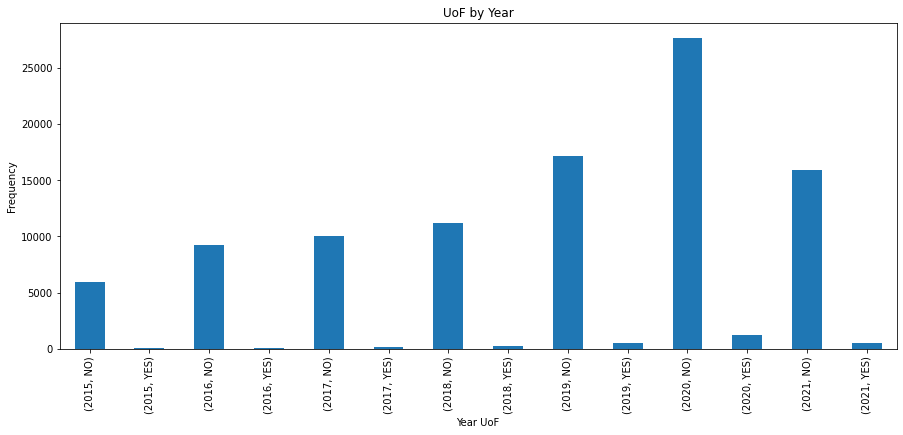

In [45]:
yearly_uof.plot(kind = 'bar', figsize=(15,6))
plt.title('UoF by Year')
plt.xlabel('Year UoF')
plt.ylabel('Frequency')

# Yearly UoF- Yes and Yearly Total Percentage

In [24]:
year_yes = df[df['UoF'] == 'YES']#.size( )
# year_yes
year_yes1 = year_yes.groupby(['YEAR']).size()
year_yes1

YEAR
2015     108
2016     126
2017     170
2018     278
2019     488
2020    1227
2021     503
Freq: A-DEC, dtype: int64

In [59]:
yearly_total = df.groupby(['YEAR']).size()
yearly_total

YEAR
2015     6015
2016     9393
2017    10234
2018    11450
2019    17650
2020    28845
2021    16445
Freq: A-DEC, dtype: int64

In [60]:
# yearly_uof= df.groupby(['YEAR', 'UoF']).size()
yearly_yes = (year_yes1/yearly_total) * 100
yearly_yes

YEAR
2015    1.795511
2016    1.341424
2017    1.661130
2018    2.427948
2019    2.764873
2020    4.253770
2021    3.058680
Freq: A-DEC, dtype: float64

Text(0, 0.5, 'Percentage')

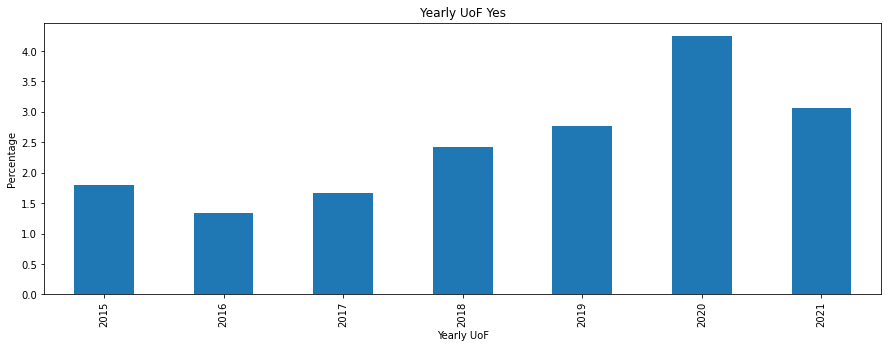

In [61]:
yearly_yes.plot(kind = 'bar', figsize=(15, 5))
plt.title("Yearly UoF Yes")
plt.xlabel("Yearly UoF")
plt.ylabel("Percentage")


# Monthly UoF- Yes  Percentage

In [48]:
yes_df2 = yes_df
mon_yes = yes_df2.groupby(['M']).size()
mon_yes

M
1     274
2     204
3     265
4     236
5     375
6     180
7     153
8     197
9     242
10    159
11    296
12    319
dtype: int64

In [56]:
#monthly incidents of the whole dataframe
monthly_total = df.groupby(['M']).size()
monthly_total

M
1      8550
2      7488
3      8399
4      8863
5     11110
6      8079
7      7892
8      7967
9      7620
10     8173
11     7936
12     7955
dtype: int64

In [57]:
#percentage of yes inc 
monthly_yes = (mon_yes/monthly_total) * 100
monthly_yes

M
1     3.204678
2     2.724359
3     3.155138
4     2.662755
5     3.375338
6     2.227999
7     1.938672
8     2.472700
9     3.175853
10    1.945430
11    3.729839
12    4.010057
dtype: float64

Text(0, 0.5, 'Monthly Total Percentage')

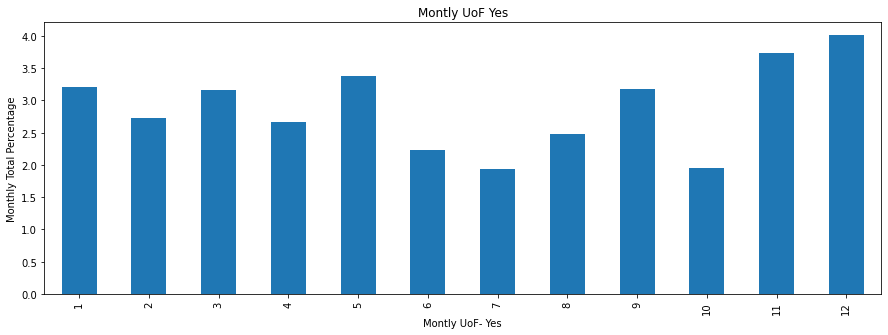

In [58]:
monthly_yes.plot(kind = 'bar', figsize=(15, 5))
plt.title("Montly UoF Yes")
plt.xlabel("Montly UoF- Yes")
plt.ylabel("Monthly Total Percentage")

In [55]:
# yes_df

# Yearly uof

In [225]:
yearly_uof= df.groupby(['YEAR', 'UoF']).size()
yearly_uof

YEAR  UoF
2015  NO      5907
      YES      108
2016  NO      9267
      YES      126
2017  NO     10064
      YES      170
2018  NO     11172
      YES      278
2019  NO     17162
      YES      488
2020  NO     27618
      YES     1227
2021  NO     15942
      YES      503
dtype: int64

In [226]:
#proportion of uof by year
yearly_uof_proportion = (yearly_uof/yearly_incidents) * 100
yearly_uof_proportion

YEAR  UoF
2015  NO     98.204489
      YES     1.795511
2016  NO     98.658576
      YES     1.341424
2017  NO     98.338870
      YES     1.661130
2018  NO     97.572052
      YES     2.427948
2019  NO     97.235127
      YES     2.764873
2020  NO     95.746230
      YES     4.253770
2021  NO     96.941320
      YES     3.058680
dtype: float64

In [53]:
# yearly_uof_proportion.to_frame()

# Yearly offense/incident

In [148]:
#yearly offense incident
yearly_ofin= df.groupby(["YEAR", "OffenseIncident"]).size()
yearly_ofin

YEAR  OffenseIncident
2015  -                   6015
2016  -                   9393
2017  -                  10234
2018  -                  11450
2019  -                   9588
      INCIDENT            5426
      OFFENSE             2636
2020  -                  10892
      INCIDENT           12218
      OFFENSE             5735
2021  -                   8497
      INCIDENT            4773
      OFFENSE             3175
dtype: int64

Text(0, 0.5, 'Frequency')

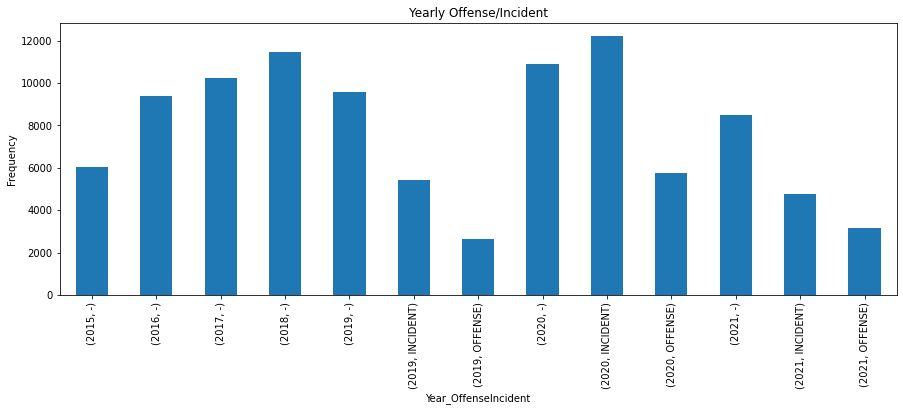

In [232]:
yearly_ofin.plot(kind = 'bar', figsize = (15, 5))
plt.title("Yearly Offense/Incident")
plt.xlabel("Year_OffenseIncident")
plt.ylabel("Frequency")

## Yearly OffInc in the UoF Yes

In [89]:
yearly_ofin2= yes_df.groupby(["YEAR", "OffenseIncident"]).size()
yearly_ofin2

YEAR  OffenseIncident
2015  -                  108
2016  -                  126
2017  -                  170
2018  -                  278
2019  -                  138
      INCIDENT            88
      OFFENSE            262
2020  -                   70
      INCIDENT           471
      OFFENSE            686
2021  -                   81
      INCIDENT           131
      OFFENSE            291
dtype: int64

Text(0, 0.5, 'Yes Offense Inc')

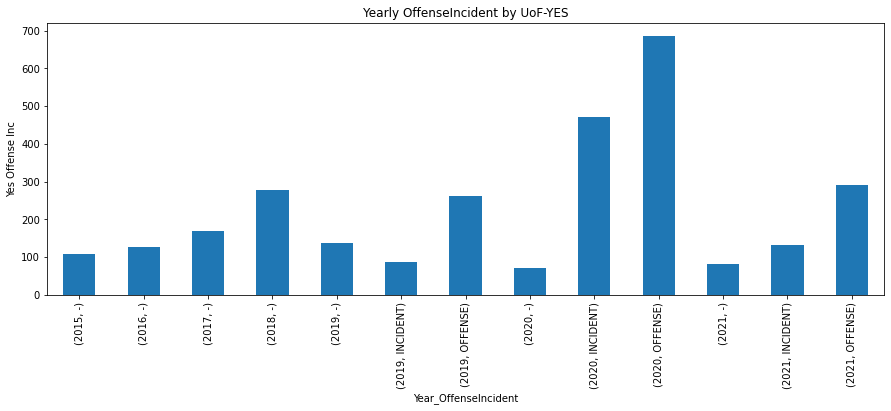

In [90]:
yearly_ofin2.plot(kind = 'bar', figsize = (15, 5))
plt.title("Yearly OffenseIncident by UoF-YES")
plt.xlabel("Year_OffenseIncident")
plt.ylabel("Yes Offense Inc")

# Montly OffenseIncidents UoF - YES

In [91]:
monyes_ofin= yes_df.groupby(["M", "OffenseIncident"]).size()
monyes_ofin

M   OffenseIncident
1   -                   66
    INCIDENT            65
    OFFENSE            143
2   -                   95
    INCIDENT            38
    OFFENSE             71
3   -                   62
    INCIDENT            85
    OFFENSE            118
4   -                   93
    INCIDENT            52
    OFFENSE             91
5   -                   93
    INCIDENT           148
    OFFENSE            134
6   -                   64
    INCIDENT            31
    OFFENSE             85
7   -                   69
    INCIDENT            19
    OFFENSE             65
8   -                   97
    INCIDENT            49
    OFFENSE             51
9   -                   82
    INCIDENT            62
    OFFENSE             98
10  -                   66
    INCIDENT            29
    OFFENSE             64
11  -                   57
    INCIDENT            54
    OFFENSE            185
12  -                  127
    INCIDENT            58
    OFFENSE            134
dtype: i

<AxesSubplot:xlabel='M,OffenseIncident'>

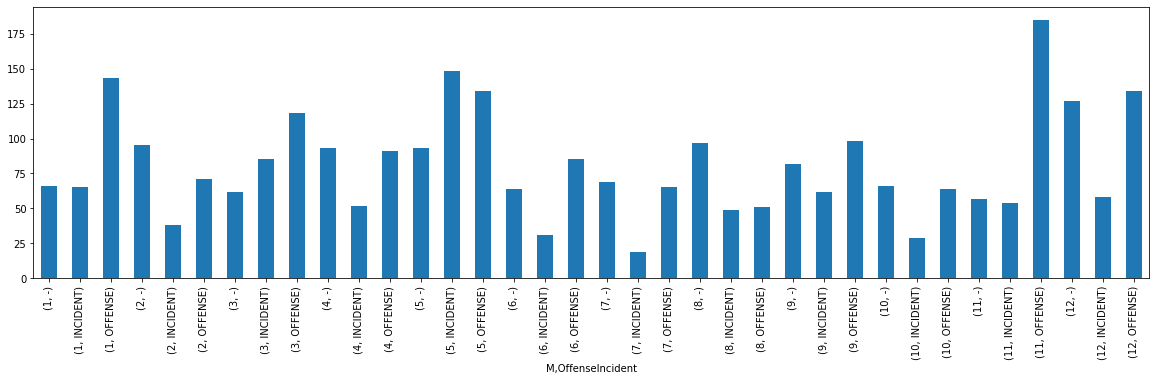

In [92]:
monyes_ofin.plot(kind = 'bar', figsize=(20,5), stacked='True' )

# Yearly Weapons

<AxesSubplot:xlabel='YEAR,Weapons'>

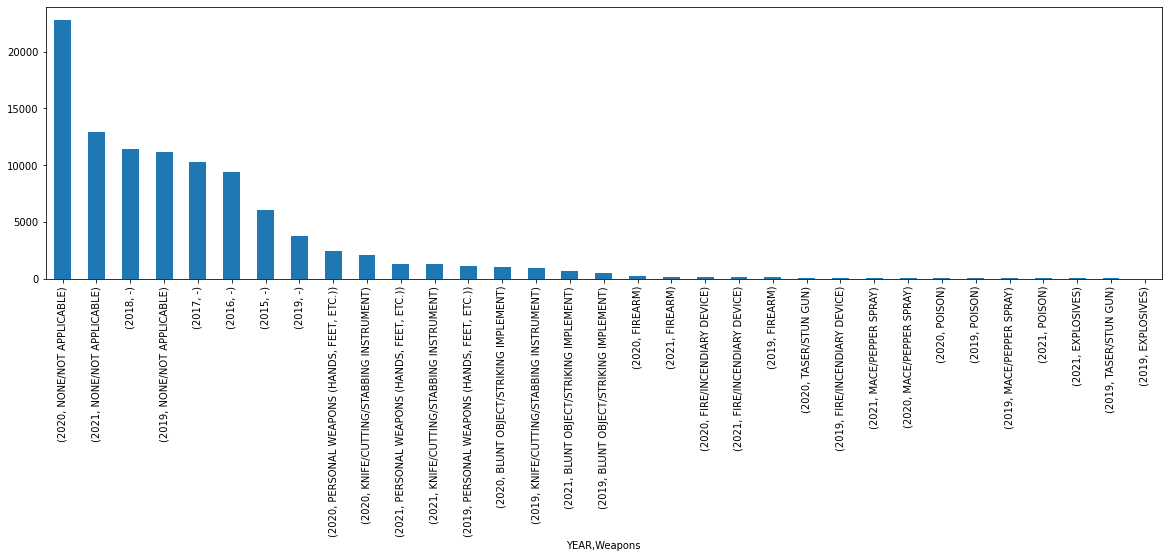

In [93]:
yearly_weap= df.groupby(["YEAR", "Weapons"]).size().sort_values(ascending=False)
yearly_weap.plot(kind = 'bar', figsize= (20,5))

In [94]:
yearly_weap

YEAR  Weapons                             
2020  NONE/NOT APPLICABLE                     22825
2021  NONE/NOT APPLICABLE                     12894
2018  -                                       11450
2019  NONE/NOT APPLICABLE                     11200
2017  -                                       10234
2016  -                                        9393
2015  -                                        6015
2019  -                                        3737
2020  PERSONAL WEAPONS (HANDS, FEET, ETC.)     2401
      KNIFE/CUTTING/STABBING INSTRUMENT        2104
2021  PERSONAL WEAPONS (HANDS, FEET, ETC.)     1287
      KNIFE/CUTTING/STABBING INSTRUMENT        1245
2019  PERSONAL WEAPONS (HANDS, FEET, ETC.)     1129
2020  BLUNT OBJECT/STRIKING IMPLEMENT          1055
2019  KNIFE/CUTTING/STABBING INSTRUMENT         923
2021  BLUNT OBJECT/STRIKING IMPLEMENT           690
2019  BLUNT OBJECT/STRIKING IMPLEMENT           450
2020  FIREARM                                   192
2021  FIREARM        

# Yearly Weapons by UoF - YES

<AxesSubplot:xlabel='YEAR,Weapons'>

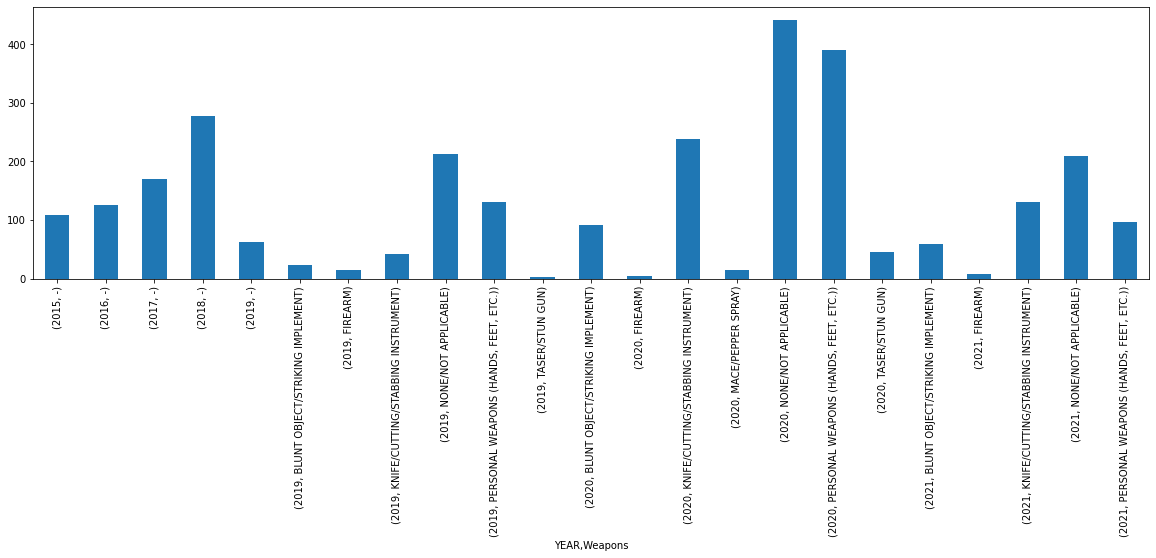

In [252]:
yearly_weap2= yes_df.groupby(["YEAR", "Weapons"]).size()
yearly_weap2.plot(kind = 'bar', figsize= (20,5))

In [251]:
yes_df.groupby(["YEAR", "Weapons"]).size()

YEAR  Weapons                             
2015  -                                       108
2016  -                                       126
2017  -                                       170
2018  -                                       278
2019  -                                        63
      BLUNT OBJECT/STRIKING IMPLEMENT          23
      FIREARM                                  15
      KNIFE/CUTTING/STABBING INSTRUMENT        42
      NONE/NOT APPLICABLE                     212
      PERSONAL WEAPONS (HANDS, FEET, ETC.)    131
      TASER/STUN GUN                            2
2020  BLUNT OBJECT/STRIKING IMPLEMENT          91
      FIREARM                                   5
      KNIFE/CUTTING/STABBING INSTRUMENT       238
      MACE/PEPPER SPRAY                        15
      NONE/NOT APPLICABLE                     442
      PERSONAL WEAPONS (HANDS, FEET, ETC.)    390
      TASER/STUN GUN                           46
2021  BLUNT OBJECT/STRIKING IMPLEMENT          59
      F

In [244]:
df.head()

,Behavioral Crisis Num,CAD Event ID,Disposition,Behavior,OffenseIncident,Age,Gender,Race,Techniques,UoF,Weapons,Date,MONTH,DAY,day_of_week,YEAR
0,43653,2015000159907,NO ACTION POSSIBLE/NECESSARY,-,-,-1,-,-,-,NO,-,2015-05-15,2015-05,2015-05-15,4,2015
1,43719,2015000160408,UNABLE TO CONTACT,-,-,-1,-,-,-,NO,-,2015-05-16,2015-05,2015-05-16,5,2015
2,43845,2015000160465,RESOURCES DECLINED,-,-,-1,-,-,-,NO,-,2015-05-16,2015-05,2015-05-16,5,2015
3,43992,2015000159631,GERIATRIC REGIONAL ASSESSMENT TEAM,-,-,-1,-,-,-,NO,-,2015-05-15,2015-05,2015-05-15,4,2015
4,44102,-1,VOLUNTARY COMMITTAL,-,-,-1,-,-,-,NO,-,2015-05-16,2015-05,2015-05-16,5,2015


In [249]:
yes_df['Weapons'].unique()

array(['-', 'NONE/NOT APPLICABLE', 'PERSONAL WEAPONS (HANDS, FEET, ETC.)',
       'KNIFE/CUTTING/STABBING INSTRUMENT',
       'BLUNT OBJECT/STRIKING IMPLEMENT', 'FIREARM', 'TASER/STUN GUN',
       'MACE/PEPPER SPRAY'], dtype=object)

# Yearly Technique

In [255]:
df['Techniques'].unique()

array(['-', 'VERBALIZATION', 'GURNEY', 'HANDCUFFING', 'NONE'],
      dtype=object)

# OffesneIncident plot

Text(0, 0.5, 'Frequency')

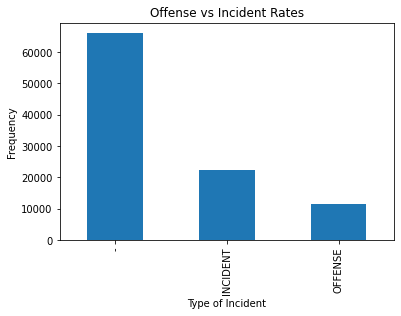

In [156]:
#group into categories
offense = df.groupby('OffenseIncident').size().sort_values(ascending=False)
offense
offense.plot(kind = 'bar')
plt.title("Offense vs Incident Rates")
plt.xlabel("Type of Incident")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

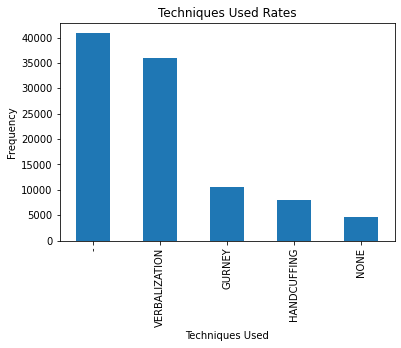

In [155]:
#group into categories
tech = df.groupby('Techniques').size().sort_values(ascending=False)
tech
#TECHNIQUES USED PLOT
tech.plot(kind = 'bar')
plt.title("Techniques Used Rates")
plt.xlabel("Techniques Used")
plt.ylabel("Frequency")

In [14]:
df['Techniques'].value_counts()

-                40829
VERBALIZATION    36002
GURNEY           10520
HANDCUFFING       8060
NONE              4621
Name: Techniques, dtype: int64

In [157]:
# df.head()
# df.shape #(100032, 12)

In [158]:
# df['Weapons Involved']

In [159]:
# df['Behavior'].unique() #len 27 previously 19

In [160]:
# df['Disposition'].unique()

In [161]:
dd = df['Disposition'].drop_duplicates() #len() 30 still 30
# dd.unique()

In [163]:
# len(df.isna()) #100032

# Exhibiting Behavior 

Text(0.5, 1.0, 'Exhibiting Behavior groups')

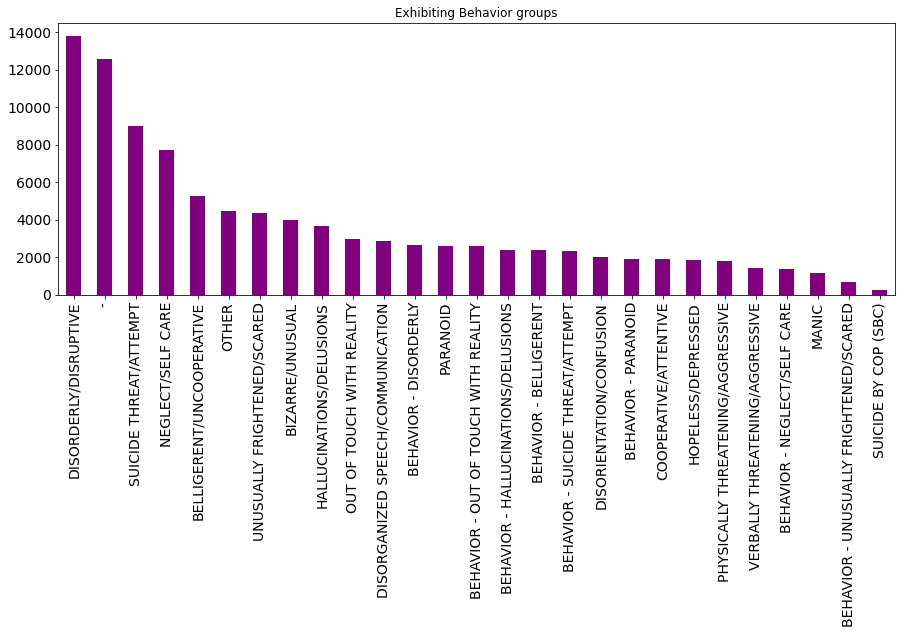

In [164]:
# plot_bar = df.groupby(['Exhibiting Behavior (group)'])['Disposition'].count() # this one won't be descending order
plot_bar = df.Behavior.value_counts()
ax = plot_bar.plot(kind = 'bar', figsize = (15, 5), color= 'purple', fontsize=14)
ax.set_title('Exhibiting Behavior groups')


In [25]:
 #Not descensing order
# plot_bar2 = df.groupby(['Disposition'])['Behavior'].count()
# ax2 = plot_bar2.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
# ax2.set_title('Disposition Type')

# Disposition Plot

In [165]:
df[df['Disposition']== 'EMERGENT DETENTION/ITA']['Disposition'].count() #41087
# df[df['Disposition']== 'EMERGENT DETENTION/ITA']

41087

Text(0.5, 1.0, 'Disposition Type')

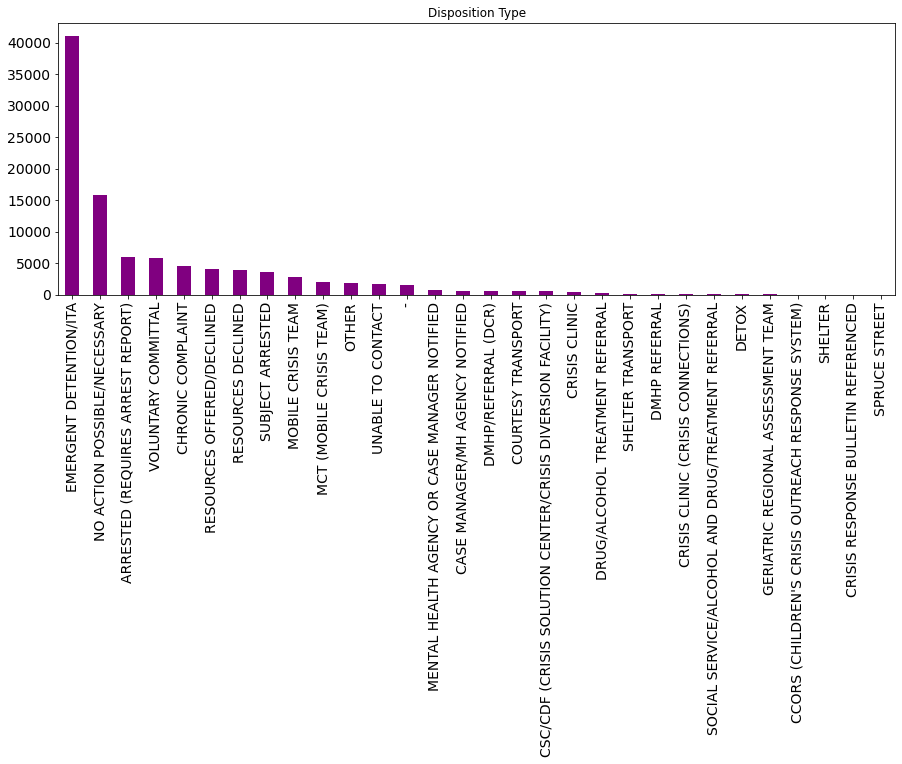

In [167]:
# another method to get the bar plot for Disposition column
dis = df['Disposition'].value_counts()
ax3 = dis.plot(kind = 'bar', figsize = (15, 5), color= 'purple', fontsize=14)
ax3.set_title('Disposition Type')

In [168]:
# df.groupby('Disposition').size()

In [30]:
# df["Disposition"].value_counts()

In [45]:
# df[df['Subject Age']==-1].count() #43603

Behavioral Crisis Num          43603
CAD Event ID                   43603
Disposition                    43603
Exhibiting Behavior (group)    43603
Offense/Incident Ind           43603
Subject Age                    43603
Subject Gender                 43603
Subject Race                   43603
Techniques Used                43603
UoF Indicator                  43603
Weapons Involved               43603
Reported Date (Date)           43603
dtype: int64

# my_contingency_table


In [32]:
my_contingency_table = pd.crosstab(index=df["Disposition"], columns=df["Behavior"]) #rows is index
my_contingency_table

Behavior,-,BEHAVIOR - BELLIGERENT,BEHAVIOR - DISORDERLY,BEHAVIOR - HALLUCINATIONS/DELUSIONS,BEHAVIOR - NEGLECT/SELF CARE,BEHAVIOR - OUT OF TOUCH WITH REALITY,BEHAVIOR - PARANOID,BEHAVIOR - SUICIDE THREAT/ATTEMPT,BEHAVIOR - UNUSUALLY FRIGHTENED/SCARED,BELLIGERENT/UNCOOPERATIVE,...,MANIC,NEGLECT/SELF CARE,OTHER,OUT OF TOUCH WITH REALITY,PARANOID,PHYSICALLY THREATENING/AGGRESSIVE,SUICIDE BY COP (SBC),SUICIDE THREAT/ATTEMPT,UNUSUALLY FRIGHTENED/SCARED,VERBALLY THREATENING/AGGRESSIVE
Disposition,,,,,,,,,,,,,,,,,,,,,
-,522,0,0,0,0,0,0,0,0,61,...,0,169,126,0,0,0,0,158,174,0
ARRESTED (REQUIRES ARREST REPORT),202,526,482,192,105,343,192,130,39,533,...,126,93,174,278,155,391,41,135,31,285
CASE MANAGER/MH AGENCY NOTIFIED,21,23,33,26,7,26,16,8,10,26,...,15,17,30,32,33,19,1,12,9,17
CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM),0,2,4,0,2,1,1,3,3,7,...,1,1,10,3,0,5,0,3,0,3
CHRONIC COMPLAINT,1151,53,65,102,17,100,63,10,20,240,...,20,400,190,93,124,12,0,213,461,12
COURTESY TRANSPORT,37,10,15,29,10,26,29,9,17,20,...,9,10,37,27,47,1,0,12,17,4
CRISIS CLINIC,142,0,0,0,0,0,0,0,0,7,...,0,47,36,0,0,0,0,70,89,0
CRISIS CLINIC (CRISIS CONNECTIONS),11,3,5,4,4,4,8,3,3,11,...,3,1,2,5,17,7,0,2,4,0
CRISIS RESPONSE BULLETIN REFERENCED,2,2,3,7,1,3,3,0,0,1,...,0,0,3,0,0,0,1,0,0,1


In [33]:
# sns.heatmap(my_contingency_table)

# Cross tables by either columns or indexes

In [34]:
pd.crosstab(index=df["Disposition"], columns=df["Behavior"], normalize="columns")*100

Behavior,-,BEHAVIOR - BELLIGERENT,BEHAVIOR - DISORDERLY,BEHAVIOR - HALLUCINATIONS/DELUSIONS,BEHAVIOR - NEGLECT/SELF CARE,BEHAVIOR - OUT OF TOUCH WITH REALITY,BEHAVIOR - PARANOID,BEHAVIOR - SUICIDE THREAT/ATTEMPT,BEHAVIOR - UNUSUALLY FRIGHTENED/SCARED,BELLIGERENT/UNCOOPERATIVE,...,MANIC,NEGLECT/SELF CARE,OTHER,OUT OF TOUCH WITH REALITY,PARANOID,PHYSICALLY THREATENING/AGGRESSIVE,SUICIDE BY COP (SBC),SUICIDE THREAT/ATTEMPT,UNUSUALLY FRIGHTENED/SCARED,VERBALLY THREATENING/AGGRESSIVE
Disposition,,,,,,,,,,,,,,,,,,,,,
-,4.151093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.156617,...,0.000000,2.191106,2.804987,0.000000,0.000000,0.000000,0.000000,1.755751,3.980782,0.000000
ARRESTED (REQUIRES ARREST REPORT),1.606362,22.278695,18.223062,8.013356,7.559395,13.121653,9.984399,5.617978,5.829596,10.106181,...,10.899654,1.205757,3.873553,9.344538,5.904762,21.722222,16.599190,1.500167,0.709220,20.299145
CASE MANAGER/MH AGENCY NOTIFIED,0.166998,0.974163,1.247637,1.085142,0.503960,0.994644,0.832033,0.345722,1.494768,0.492984,...,1.297578,0.220407,0.667854,1.075630,1.257143,1.055556,0.404858,0.133348,0.205903,1.210826
CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM),0.000000,0.084710,0.151229,0.000000,0.143988,0.038256,0.052002,0.129646,0.448430,0.132727,...,0.086505,0.012965,0.222618,0.100840,0.000000,0.277778,0.000000,0.033337,0.000000,0.213675
CHRONIC COMPLAINT,9.153082,2.244812,2.457467,4.257095,1.223902,3.825555,3.276131,0.432152,2.989537,4.550626,...,1.730104,5.186050,4.229742,3.126050,4.723810,0.666667,0.000000,2.366930,10.546786,0.854701
COURTESY TRANSPORT,0.294235,0.423549,0.567108,1.210351,0.719942,0.994644,1.508060,0.388937,2.541106,0.379219,...,0.778547,0.129651,0.823687,0.907563,1.790476,0.055556,0.000000,0.133348,0.388927,0.284900
CRISIS CLINIC,1.129225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.132727,...,0.000000,0.609361,0.801425,0.000000,0.000000,0.000000,0.000000,0.777864,2.036147,0.000000
CRISIS CLINIC (CRISIS CONNECTIONS),0.087475,0.127065,0.189036,0.166945,0.287977,0.153022,0.416017,0.129646,0.448430,0.208570,...,0.259516,0.012965,0.044524,0.168067,0.647619,0.388889,0.000000,0.022225,0.091512,0.000000
CRISIS RESPONSE BULLETIN REFERENCED,0.015905,0.084710,0.113422,0.292154,0.071994,0.114767,0.156006,0.000000,0.000000,0.018961,...,0.000000,0.000000,0.066785,0.000000,0.000000,0.000000,0.404858,0.000000,0.000000,0.071225


In [72]:
# df['Race'].unique()
df1 = df[(df['Gender']=='Male') & (df['Race']=='White')]

,Behavioral Crisis Num,CAD Event ID,Disposition,Behavior,OffenseIncident,Age,Gender,Race,Techniques,UoF,Weapons,Date,MONTH,DAY
10140,8196226438,2019000162778,MCT (MOBILE CRISIS TEAM),-,-,20,Male,White,VERBALIZATION,NO,NONE/NOT APPLICABLE,2019-05-07,2019-05,2019-05-07
10153,8203894830,2019000164721,VOLUNTARY COMMITTAL,-,INCIDENT,17,Male,White,VERBALIZATION,NO,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2019-05-08,2019-05,2019-05-08
10162,8207782534,2019000166828,VOLUNTARY COMMITTAL,-,-,67,Male,White,NONE,NO,NONE/NOT APPLICABLE,2019-05-09,2019-05,2019-05-09
10165,8211429258,2019000167517,OTHER,-,-,37,Male,White,VERBALIZATION,NO,NONE/NOT APPLICABLE,2019-05-10,2019-05,2019-05-10
10166,8212714855,2019000167637,NO ACTION POSSIBLE/NECESSARY,-,INCIDENT,34,Male,White,VERBALIZATION,NO,NONE/NOT APPLICABLE,2019-05-10,2019-05,2019-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,25346477486,2021000132662,RESOURCES OFFERED/DECLINED,VERBALLY THREATENING/AGGRESSIVE,INCIDENT,34,Male,White,VERBALIZATION,NO,NONE/NOT APPLICABLE,2021-05-30,2021-05,2021-05-30
99993,25353427474,2021000133713,EMERGENT DETENTION/ITA,VERBALLY THREATENING/AGGRESSIVE,OFFENSE,-1,Male,White,GURNEY,NO,NONE/NOT APPLICABLE,2021-05-31,2021-05,2021-05-31
99994,25353427474,2021000133713,EMERGENT DETENTION/ITA,VERBALLY THREATENING/AGGRESSIVE,OFFENSE,-1,Male,White,HANDCUFFING,NO,NONE/NOT APPLICABLE,2021-05-31,2021-05,2021-05-31
99995,25353427474,2021000133713,EMERGENT DETENTION/ITA,VERBALLY THREATENING/AGGRESSIVE,OFFENSE,-1,Male,White,VERBALIZATION,NO,NONE/NOT APPLICABLE,2021-05-31,2021-05,2021-05-31


In [73]:
# df1['Disposition'].value_counts()

EMERGENT DETENTION/ITA                                        9658
NO ACTION POSSIBLE/NECESSARY                                  2673
ARRESTED (REQUIRES ARREST REPORT)                             2318
RESOURCES OFFERED/DECLINED                                    1192
VOLUNTARY COMMITTAL                                            836
OTHER                                                          548
MCT (MOBILE CRISIS TEAM)                                       525
CHRONIC COMPLAINT                                              379
UNABLE TO CONTACT                                              210
CASE MANAGER/MH AGENCY NOTIFIED                                177
DMHP/REFERRAL (DCR)                                            168
COURTESY TRANSPORT                                             165
CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)     128
CRISIS CLINIC (CRISIS CONNECTIONS)                              30
SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL            